In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib import rcParams

In [2]:
hydraulic_jump = pd.ExcelFile('hydraulic_jump_data.xlsx')

In [3]:
hydraulic_jump.sheet_names

['Sheet1', 'Sheet2', 'Sheet3', 'Sheet4', 'Sheet5', 'Sheet6', 'Sheet7']

In [4]:
table1 = hydraulic_jump.parse('Sheet1', skiprows = 4)  #Experimental values expressing the relationship between Lr*/h1 and the Froude number for (h0 / h2 ) ≥ 1
table2 = hydraulic_jump.parse('Sheet2', skiprows = 4)  #Experimental values expressing the relationship between Lr * / h1 and the Froude number for h0 / h2<1
table3 = hydraulic_jump.parse('Sheet3', skiprows = 4)  #Experimental values used to plot the curves Y = f (Fr1) for (h0 / h2 ≥ 1) conjugated heights 
table4 = hydraulic_jump.parse('Sheet4', skiprows = 4)  #Experimental values used to plot the curves Y = f (Fr1) for  (h0 / h2<1) conjugate heights
table5 = hydraulic_jump.parse('Sheet5', skiprows = 4)  #Experimental values used to draw the curves y = f (X) for h0 / h2 ≥1
table6 = hydraulic_jump.parse('Sheet6', skiprows = 4)  #Experimental values used to draw the curves y = f (X) for h0 / h2 ˂ 1
table7 = hydraulic_jump.parse('Sheet7', skiprows = 4)  #classes

In [5]:
table2

,Lr*/h1,Fr1,Lr*/h1.1,Fr1.1,Lr*/h1.2,Fr1.2,Lr*/h1.3,Fr1.3,Lr*/h1.4,Fr1.4,Lr*/h1.5,Fr1.5
0,52.00,8.50,49.0,8.50,72.0,10.56,74.5,11.07,70.0,10.69,53.0,8.61
1,59.50,9.45,57.5,9.45,75.0,11.07,76.5,11.32,53.5,8.85,55.0,8.97
2,67.50,10.19,61.5,9.82,77.5,11.20,78.0,11.45,61.5,9.57,57.5,9.45
3,69.00,10.44,69.5,10.56,79.0,11.32,52.0,8.50,62.0,9.57,54.5,9.09
4,52.25,8.61,71.0,10.69,80.5,11.45,55.0,8.97,66.0,9.94,58.0,9.45
5,58.00,9.33,76.0,11.07,58.5,9.33,59.5,9.57,67.0,10.06,61.5,9.57
6,60.50,9.69,50.0,8.38,60.0,9.57,62.5,9.82,69.0,10.44,65.0,9.82
7,63.50,9.94,55.0,9.09,67.0,10.06,64.0,10.06,70.0,10.56,NaN,NaN
8,66.00,10.31,65.0,10.06,70.5,10.56,69.0,10.44,71.0,10.69,NaN,NaN
9,56.50,9.33,68.0,10.44,73.5,10.81,69.5,10.56,74.0,10.94,NaN,NaN


In [6]:
#t = ([table1['Fr1'], table1['Lr*/h1']], [table1['Fr1.1'], table1['Lr*/h1.1']])
t1_1 = np.vstack([table1['Fr1'], table1['Lr*/h1']])
t1_2 = np.vstack([table1['Fr1.1'], table1['Lr*/h1.1']])
t1_3 = np.vstack([table1['Fr1.2'], table1['Lr*/h1.2']])
t1_4 = np.vstack([table1['Fr1.3'], table1['Lr*/h1.3']])
t1_5 = np.vstack([table1['Fr1.4'], table1['Lr*/h1.4']])
t1_6 = np.vstack([table1['Fr1.5'], table1['Lr*/h1.5']])

t2_1 = np.vstack([table2['Fr1'], table2['Lr*/h1']])
t2_2 = np.vstack([table2['Fr1.1'], table2['Lr*/h1.1']])
t2_3 = np.vstack([table2['Fr1.2'], table2['Lr*/h1.2']])
t2_4 = np.vstack([table2['Fr1.3'], table2['Lr*/h1.3']])
t2_5 = np.vstack([table2['Fr1.4'], table2['Lr*/h1.4']])
t2_6 = np.vstack([table2['Fr1.5'], table2['Lr*/h1.5']])


In [7]:
t1 = np.hstack([t1_1, t1_2, t1_3, t1_4, t1_5, t1_6])

t2 = np.hstack([t2_1, t2_2, t2_3, t2_4, t2_5, t2_6])

In [8]:
table_1 = pd.DataFrame(t1).T
table_2 = pd.DataFrame(t2).T
#table_1

In [9]:
table_1 = table_1.drop(index=[71])      # Fr vs Lr/h1     (h0 / h2 ) ≥ 1

In [10]:
table_2 = table_2.drop(index=[57,58,59])    # Fr vs Lr/h1      (h0 / h2 ) < 1

Text(0, 0.5, 'Lr*/h$_1$')

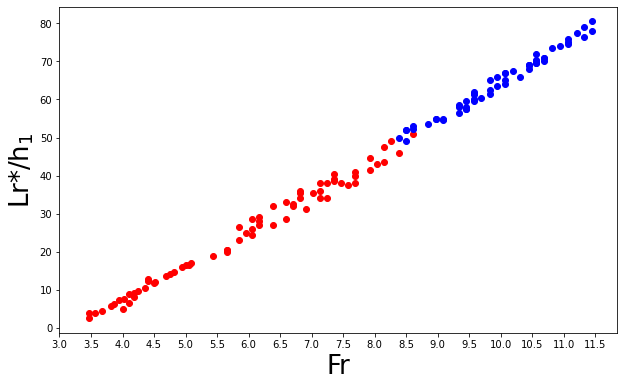

In [13]:
plt.figure(figsize=(10,6))  #plot Lr*/h1 against Froud number Fr

rcParams['font.family'] = 'sans-serif'


plt.plot(table_1[0], table_1[1], 'o', color='red')
plt.plot(table_2[0], table_2[1], 'o', color='blue')

#draw line

plt.xticks(np.arange(3,12, step=0.5))

plt.xlabel('Fr', fontsize=26)
plt.ylabel('Lr*/h$_1$', fontsize=26)


In [14]:
t3_1 = np.vstack([table3['Fr1'], table3['Y'], table3['δ']])
t3_2 = np.vstack([table3['Fr1.1'], table3['Y.1'], table3['δ.1']])

t4_1 = np.vstack([table4['Fr1'], table4['Y'], table4['δ']])
t4_2 = np.vstack([table4['Fr1.1'], table4['Y.1'], table4['δ.1']])

In [15]:
t3 = np.hstack([t3_1, t3_2])   #Fr|Y |Segma
t4 = np.hstack([t4_1, t4_2]) 


In [16]:
t3 = pd.DataFrame(t3).T    #Fr|Y |Segma    Experimental values used to plot the curves Y = f (Fr1) for (h0 / h2 ≥ 1) conjugated heights
t4 = pd.DataFrame(t4).T 


In [17]:
table_3 = t3
table_4 = t4.drop(t4.index[38:])   #drop rows (from row 38 to the last one)

Text(0, 0.5, 'Y')

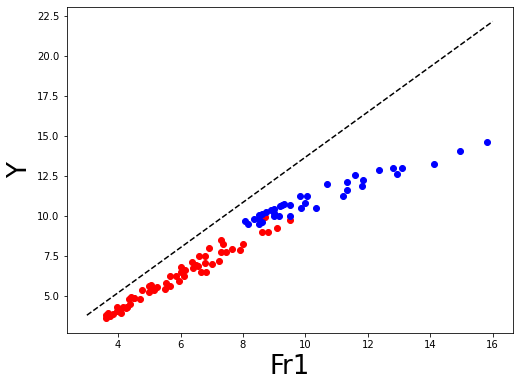

In [18]:
plt.figure(figsize=(8,6))  #plot Lr*/h1 against Froud number Fr
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

x = np.linspace(3,16,10)
#y = np.zeros((10))


y = (1/2)*(np.sqrt(1+8*x**2)-1)

plt.plot(x, y, color='black', linestyle='dashed')

plt.plot(table_3[0], table_3[1], 'o', color='red')
plt.plot(table_4[0], table_4[1], 'o', color='blue')

#plt.hlines(9,0,15, color='black')
#plt.vlines(8,0,15, color='black')

#draw line

#plt.xticks(np.arange(3,12, step=0.5))

plt.xlabel('Fr1', fontsize=26)
plt.ylabel('Y', fontsize=26)


In [ ]:
var = 'LOG_Export_Price_Index_of_Gold ~ Time_Period' # I indicate the two variables (y ~ Fr), var → expr

#Build and train the OLSR model: (ols regression)
olsr_results = smf.ols(expr, gold_data).fit()        # I 
#Plot the residual errors (stored in the olsr_results.resid field) against the Time_Period:

#Create a new pyplot figure to plot into
fig = plt.figure(figsize=(10,5))
 

fig.suptitle('Residual errors against Time_Period')  #the title of the figure
plt.xlabel('Time_Period') #x axis label 
plt.plot(gold_data['Time_Period'], olsr_results.resid, 'go--', label='Residual Errors') #the plot 
 
plt.ylabel('Residual Errors')  #y axis label
 
#Set up the legend. There is only one time series in the legend.
plt.legend()
 
#Show the plot
plt.show()

Text(0.5, 1.0, 'Fr1 (Froude number) against Y (conjugate height)')

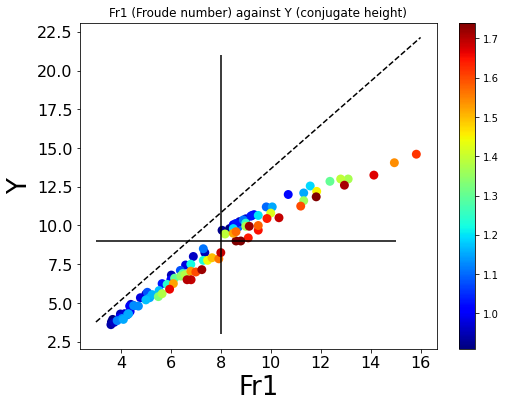

In [22]:
fig = plt.figure(figsize=(8,6))
plt.scatter(table_3[0], table_3[1],  marker='o', edgecolors='none',s=80,c=table_3[2], cmap=plt.cm.jet)
plt.scatter(table_4[0], table_4[1],edgecolors='none',s=80,c=table_4[2], cmap=plt.cm.jet)


plt.hlines(9,3,15, color='black')
plt.vlines(8,3,21, color='black')

x = np.linspace(3,16,10)
#y = np.zeros((10))


y = (1/2)*(np.sqrt(1+8*x**2)-1)

plt.plot(x, y, color='black', linestyle='dashed')

plt.xlabel('Fr1', fontsize=26)
plt.ylabel('Y', fontsize=26)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.colorbar()
plt.title('Fr1 (Froude number) against Y (conjugate height)')

In [27]:
print("Karim is the Best,                 "* 999)

Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,                 Karim is the Best,  

In [52]:
import pandas

X = table_3[[0, 2]]
y = table_3[1]

regr = linear_model.LinearRegression()     #select the model and name it
regr.fit(X, y)                             #select the dataset (the two variables, and one variable)

print(regr.coef_)

[ 1.23376037 -1.49462279]


In [410]:
pred = regr.predict([[3.67, 0.91]])
pred

array([3.93225274])

In [47]:
a = [1,2,3,4,5,6,7,8,9]
b = [2,4,6,8,10,12,14,16,18]
ds = pd.DataFrame(np.array((a,b))).T

In [51]:
ds[1]

0     2
1     4
2     6
3     8
4    10
5    12
6    14
7    16
8    18
Name: 1, dtype: int64

In [48]:
nee = linear_model.LinearRegression()
nee.fit(ds[0], ds[1])

ValueError: Expected 2D array, got 1D array instead:
array=[1 2 3 4 5 6 7 8 9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [303]:
table_3

,0,1,2
0,3.67,3.94,0.91
1,3.62,3.77,0.92
2,3.60,3.60,0.94
3,6.02,6.80,0.95
4,7.36,8.25,0.95
5,3.98,4.29,0.95
6,4.40,4.91,0.95
7,6.90,8.00,0.96
8,3.73,3.75,0.96
9,5.00,5.57,0.96


In [347]:
a = [table_3[0], table_3[1]]

In [383]:
residul = table_3.iloc[:,[1]];

In [384]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(residul)


array([0.07597869])

In [388]:
plt.scatter(y_pred, residul)

NameError: name 'y_pred' is not defined

In [623]:
#print(int2['t'] == -0.266667).count()
#np.where(int2['t'] == 0)
#int2['t'][5919]
24.5333//0.033333

736.0